In [1]:
!pip install pdfplumber nltk scikit-learn matplotlib wordcloud


     ---------------------------------------- 60.0/60.0 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 299.9/299.9 kB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 7.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pdfplumber

# Read the PDF
pdf_path = "introduction-to-text-analysis.pdf"
text = ""

with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        text += page.extract_text() + " "

print(text[:1000])  # Preview the first 1000 characters


Cannot set gray non-stroke color because /'Pat0' is an invalid float value
Cannot set gray non-stroke color because /'Pat1' is an invalid float value
Cannot set gray non-stroke color because /'Pat0' is an invalid float value


 Table of Contents
1. Preface 1.1
2. Acknowledgements 1.2
3. Introduction 1.3
1. For Instructors 1.3.1
2. For Students 1.3.2
3. Schedule 1.3.3
4. Issues in Digital Text Analysis 1.4
1. Why Read with a Computer? 1.4.1
2. Google NGram Viewer 1.4.2
3. Exercises 1.4.3
5. Close Reading 1.5
1. Close Reading and Sources 1.5.1
2. Prism Part One 1.5.2
3. Exercises 1.5.3
6. Crowdsourcing 1.6
1. Crowdsourcing 1.6.1
2. Prism Part Two 1.6.2
3. Exercises 1.6.3
7. Digital Archives 1.7
1. Text Encoding Initiative 1.7.1
2. NINES and Digital Archives 1.7.2
3. Exercises 1.7.3
8. Data Cleaning 1.8
1. Problems with Data 1.8.1
2. Zotero 1.8.2
3. Exercises 1.8.3
9. Cyborg Readers 1.9
1. How Computers Read Texts 1.9.1
2. Voyant Part One 1.9.2
3. Exercises 1.9.3
10. Reading at Scale 1.10
1. Distant Reading 1.10.1
2. Voyant Part Two 1.10.2
3. Exercises 1.10.3
11. Topic Modeling 1.11
1. Bags of Words 1.11.1
2. Topic Modeling Case Study 1.11.2
3. Exercises 1.11.3
12. Classifiers 1.12
1. Supervised Classifiers 1.1

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()
stop_words = set(stopwords.words("english"))

def preprocess(text):
    text = re.sub(r'\W', ' ', text.lower())  # remove punctuation
    tokens = word_tokenize(text)
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

cleaned_text = preprocess(text)
print(cleaned_text[:500])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


tabl content 1 prefac 1 1 2 acknowledg 1 2 3 introduct 1 3 1 instructor 1 3 1 2 student 1 3 2 3 schedul 1 3 3 4 issu digit text analysi 1 4 1 read comput 1 4 1 2 googl ngram viewer 1 4 2 3 exercis 1 4 3 5 close read 1 5 1 close read sourc 1 5 1 2 prism part one 1 5 2 3 exercis 1 5 3 6 crowdsourc 1 6 1 crowdsourc 1 6 1 2 prism part two 1 6 2 3 exercis 1 6 3 7 digit archiv 1 7 1 text encod initi 1 7 1 2 nine digit archiv 1 7 2 3 exercis 1 7 3 8 data clean 1 8 1 problem data 1 8 1 2 zotero 1 8 2 3 


In [4]:
corpus = [cleaned_text]


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1000)
X_bow = cv.fit_transform(corpus)
bow_df = pd.DataFrame(X_bow.toarray(), columns=cv.get_feature_names_out())
bow_df.head()


,00,035211267605633804,10,11,12,13,14,15,17,1820,...,worth,would,write,written,wrong,wrote,xv,year,yet,zotero
0,4,17,10,11,14,8,9,8,7,4,...,6,109,33,15,7,7,4,15,7,72


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(corpus)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df.head()


,00,035211267605633804,10,11,12,13,14,15,17,1820,...,worth,would,write,written,wrong,wrote,xv,year,yet,zotero
0,0.00393,0.016701,0.009824,0.010807,0.013754,0.007859,0.008842,0.007859,0.006877,0.00393,...,0.005895,0.107084,0.03242,0.014736,0.006877,0.006877,0.00393,0.014736,0.006877,0.070735


In [8]:
tokens = word_tokenize(cleaned_text)
print(tokens[:20])


['tabl', 'content', '1', 'prefac', '1', '1', '2', 'acknowledg', '1', '2', '3', 'introduct', '1', '3', '1', 'instructor', '1', '3', '1', '2']


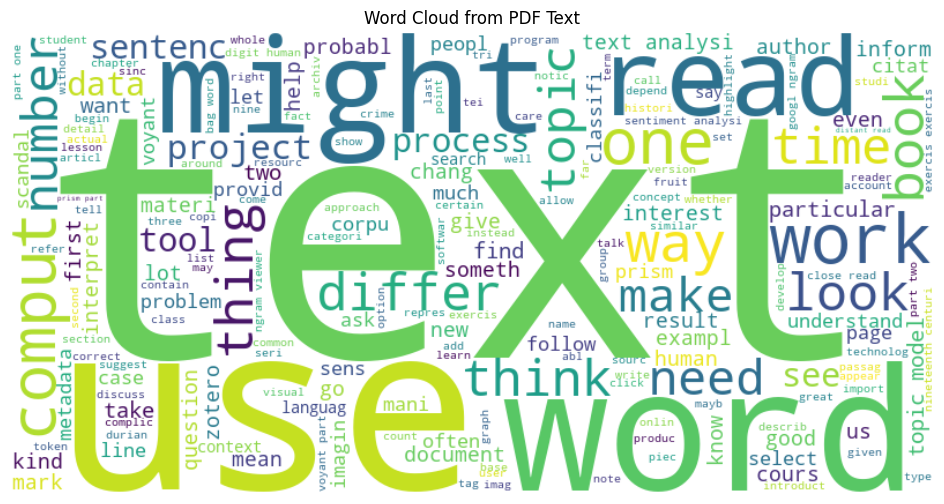

: 

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from PDF Text")
plt.show()
